*Исследование проведено Поварковой Екатериной Андреевной, участницей регионального чемпионата(Алтайский край) сезона ИИ, проводимого в рамках проекта Цифровой прорыв 2022 в период с 25.08.2022 по 22.09.2022*

# Прогнозирование статуса студента

Данный проект выполняется с целью решения задачи, поставленной в рамках чемпионата по ML, по предосталенным Алтайским государствнным университетом данным о студентах.
<br>
<br> **Конечной целью исследования** является разработка модели, которая будет предсказывать текущий статус студента, а именно:
<br> -- продолжит ли студент обучение;
<br> -- отчислится;
<br>

**Справка о данных:**
<br> 1) **ID**: персональный идентификатор абитуриента
<br> 2) **Код_группы**: идентификатор группы
<br> 3) **Год_Поступления**: год поступления абитуриента
<br> 4) **Пол**: пол абитуриента, имеет идентификаторы:
        <br>● Муж
        <br>● Жен
<br> 5) **Основания**: основания поступления абитуриента. Имеются следующие значения:
        <br>- СН - специальный набор
        <br>● ЦН - целевой набор
        <br>● БН - бюджетный набор
        <br>● ОО - общие основания
        <br>● ДН - дополнительный прием
<br> 6) **Изучаемый_Язык**: иностранный язык, который изучался абитуриентом (Поскольку долгое время данное поле было полем ввода, то происходит дублирование значений)
<br> 7) **Дата_Рождения**: дата рождения абитуриента
<br> 8) **Уч_Заведение**: наименование учебного заведения
<br> 9) **Где_Находится_УЗ**: локация учебного заведения (Структура данного поля разнообразна, может происходить наименование города, а может указываться область+город или даже страна+область+город)
<br> 10) **Год_Окончания_УЗ**: год окончания учебного заведения
<br> 11) **Пособие**: получает ли абитуриент пособия. Возможные значения:
           <br>● 0 - абитуриент не получает пособие
           <br>● 1 - абитуриент получает пособие
<br> 12) **Страна_ПП**: страна постоянного проживания (Поскольку долгое время данное поле было полем ввода, то происходит
дублирование значений)
<br> 13) **Регион_ПП**: регион постоянного проживания (Поскольку долгое время данное поле было полем ввода, то происходит дублирование значений)
<br> 14) **Город_ПП**: город постоянного проживания (Поскольку долгое время данное поле было полем ввода, то происходит дублирование значений)
<br> 15) **Общежитие**: требуется ли общежитие абитуриенту. Возможные значения:
           <br>● 0 - абитуриенту не требуется общежитие
           <br>● 1 - абитуриенту требуется общежитие
<br> 16) **Наличие_Матери**: поле, показывающие наличие матери. Возможные значения:
           <br>● 0 - у абитуриента нет матери
           <br>● 1 - у абитуриента есть мать
<br> 17) **Наличие_Отца**: поле, показывающие наличие отца. Возможные значения:
           <br>● 0 - у абитуриента нет отца
           <br>● 1 - у абитуриента есть отец
<br> 18) **Страна_Родители**: страна постоянного проживания родителей
<br> 19) **Опекунство**: является ли абитуриент опекаемым. Возможные значения:
           <br>● 0 - абитуриент не является опекаемым
           <br>● 1 - абитуриент является опекаемым
<br> 20) **Село**: проживает ли абитуриент в сельской местности. Возможные значения:
           <br>● 0 - абитуриент не проживает в сельской местности
           <br>● 1 - абитуриент проживает в сельской местности
<br> 21) **Иностранец**: является ли абитуриент иностранным студентом. Возможные значения:
           <br>● 0 - абитуриент не является иностранцем
           <br>● 1 - абитуриент является иностранцем
<br> 22) **КодФакультета**: идентификатор факультета
<br> 23) **СрБаллАттестата**: средний балл аттестата или средний балл ЕГЭ. Зависит от того, сдавал ли абитуриент ЕГЭ
<br> 24) **Статус (целевая переменная)**: статус студента. Возможные значения:
           <br>● -1 – ушел в академический отпуск
           <br>● 4 – закончил обучение
           <br>● 3 – отчислен
           <br>● 5 – призван в армию

<br> **Выполнение проекта подразделено на логические части:** 
<br> 1) Загрузка и изучение данных;
<br> 2) Предобработка данных (по мере необходимости);
<br> 3) Создание модели, её обучение и тестирование;
<br> 4) Подсчет метрики качества
<br> 5) Подведение общих итогов исследования
<br>

# Загрузка данных и библиотек

In [1]:
%autosave 60

Autosaving every 60 seconds


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats as st
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [3]:
submission = pd.read_csv('sample_submission.csv')
train = pd.read_csv('train_dataset_train.csv')
test = pd.read_csv('test_dataset_test.csv')

In [4]:
datasets = [submission, train, test]

# Изучение данных

In [5]:
for data in datasets:
    print(data.shape)

(6691, 2)
(13584, 24)
(6691, 23)


In [6]:
for data in datasets:
    display(data.head(10))

,ID,Статус
0,64996,NaN
1,71837,NaN
2,86587,NaN
3,73673,NaN
4,54709,NaN
5,56072,NaN
6,77774,NaN
7,90707,NaN
8,76202,NaN
9,74726,NaN


,ID,Код_группы,Год_Поступления,Пол,Основания,Изучаемый_Язык,Дата_Рождения,Уч_Заведение,Где_Находится_УЗ,Год_Окончания_УЗ,...,Общежитие,Наличие_Матери,Наличие_Отца,Страна_Родители,Опекунство,Село,Иностранец,КодФакультета,СрБаллАттестата,Статус
0,72716,16019,2015,Жен,ОО,Английский язык,1998-02-08 00:00:00.000,"МБОУ ""СОШ №59""","Алтайский край, Барнаул г",2014.0,...,0.0,0,0.0,Россия,0.0,0.0,0.0,41.0,4.294,3
1,63306,14895,2010,Муж,ЦН,NaN,1992-04-18 00:00:00.000,NaN,NaN,NaN,...,0.0,1,1.0,Россия,0.0,0.0,0.0,28.0,67.000,4
2,82469,20103,2017,Жен,ДН,Английский язык,1999-03-21 00:00:00.000,МБОУ Алтайская СОШ №5,"Алтайский край, Алтайский р-н, Алтайское с",2017.0,...,0.0,1,1.0,Россия,0.0,0.0,0.0,41.0,4.133,4
3,81661,19838,2017,Жен,БН,Английский язык,1994-12-08 00:00:00.000,ФГБОУ ВО Алтайский государственный университет,"Алтайский край, г. Барнаул",2017.0,...,0.0,1,1.0,Россия,0.0,0.0,0.0,35.0,74.000,4
4,81509,19803,2017,Жен,БН,Английский язык,1995-06-28 00:00:00.000,ФГБОУ ВО Алтайский государственный университет,"Алтайский край, г. Барнаул",2017.0,...,0.0,1,1.0,Россия,0.0,0.0,0.0,28.0,53.000,4
5,72669,18733,2015,Муж,СН,Английский язык,1997-11-13 00:00:00.000,"МБОУ ""СОШ №110""","Алтайский край, Барнаул г",2015.0,...,0.0,0,0.0,Россия,0.0,0.0,0.0,41.0,3.692,3
6,57717,16945,2013,Муж,СН,NaN,1995-05-10 00:00:00.000,NaN,NaN,NaN,...,0.0,1,1.0,NaN,0.0,0.0,0.0,51.0,67.000,4
7,65208,18196,2014,Жен,СН,Английский язык,1996-05-20 00:00:00.000,"МБОУ ""Калманская СОШ""","Алтайский край, Калманский р-н, Калманка с",2014.0,...,1.0,0,0.0,Россия,0.0,1.0,0.0,51.0,58.000,3
8,78608,19620,2016,Жен,СН,Английский язык,1994-09-05 00:00:00.000,ФГБОУ ВО Алтайский государственный университет,"Россия, Алтайский край, г Барнаул",2016.0,...,0.0,1,1.0,Россия,0.0,0.0,0.0,26.0,78.000,4
9,83857,19966,2017,Муж,ОО,Английский язык,1999-06-24 00:00:00.000,МБОУ Лицей №101,"Алтайский край, г. Барнаул",2017.0,...,0.0,1,1.0,Россия,0.0,0.0,0.0,34.0,65.000,3


,ID,Код_группы,Год_Поступления,Пол,Основания,Изучаемый_Язык,Дата_Рождения,Уч_Заведение,Где_Находится_УЗ,Год_Окончания_УЗ,...,Город_ПП,Общежитие,Наличие_Матери,Наличие_Отца,Страна_Родители,Опекунство,Село,Иностранец,КодФакультета,СрБаллАттестата
0,64996,20608,2014,Жен,ДН,Английский язык,1995-11-03 00:00:00.000,"МБОУ ""СОШ №55""","Алтайский край, Барнаул г",2014.0,...,Барнаул г,0.0,0,0.0,Россия,0.0,0.0,0.0,40.0,49.0
1,71837,20613,2015,Жен,ДН,Немецкий язык,1995-12-10 00:00:00.000,"МБОУ ""СОШ №1""","Алтайский край, Рубцовск г",2014.0,...,Барнаул г,0.0,0,0.0,Россия,0.0,1.0,0.0,26.0,77.0
2,86587,21210,2018,Жен,ОО,Английский язык,1973-08-09 00:00:00.000,Алтайский государственный медицинский университет,"Алтайский край, г. Барнаул",1997.0,...,г. Барнаул,0.0,1,1.0,Россия,0.0,0.0,0.0,34.0,74.0
3,73673,22254,2015,Жен,ОО,Английский язык,1983-12-07 00:00:00.000,"ГОУ ВПО ""Алтайский государственный университет""","Алтайский край, Барнаул г",2006.0,...,Барнаул г,0.0,0,0.0,Россия,0.0,0.0,0.0,53.0,57.0
4,54709,15040,2012,Жен,ОО,NaN,1994-05-21 00:00:00.000,NaN,NaN,NaN,...,NaN,0.0,1,1.0,Россия,0.0,0.0,0.0,36.0,55.0
5,56072,13529,2013,Жен,ОО,Английский язык,1990-12-03 00:00:00.000,"ФГБОУ ВПО ""Алтайский государственный университет""",Барнаул,2013.0,...,г. Новоалтайск,0.0,0,0.0,Россия,0.0,0.0,0.0,28.0,92.0
6,77774,18616,2016,Жен,СН,Английский язык,1981-11-30 00:00:00.000,Бийский педагогический государственный универс...,"Россия, Алтайский край, г Бийск",2003.0,...,Белокуриха,0.0,1,1.0,Россия,0.0,0.0,0.0,26.0,56.0
7,90707,21922,2019,Жен,ОО,Английский язык,1997-02-28 00:00:00.000,ФГБОУ ВО Алтайский государственный технический...,"Алтайский край, г. Барнаул",2019.0,...,им Мамонтова п,0.0,0,0.0,Россия,0.0,1.0,0.0,27.0,58.0
8,76202,20723,2016,Жен,ДН,Английский язык,1998-09-02 00:00:00.000,МБОУ Троицкая СОШ №2,"Россия, Алтайский край, Троицкий р-н, с Троицкое",2016.0,...,NaN,0.0,1,1.0,Россия,0.0,0.0,0.0,26.0,69.0
9,74726,20664,2016,Жен,БН,Английский язык,1999-05-11 00:00:00.000,МОУ Эликманарская СОШ,"Россия, Республика Алтай, Чемальский р-н, с Эл...",2016.0,...,Аюла с,0.0,1,1.0,Россия,0.0,1.0,0.0,51.0,75.0


In [7]:
for data in datasets:
    print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6691 entries, 0 to 6690
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      6691 non-null   int64  
 1   Статус  0 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 104.7 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13584 entries, 0 to 13583
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                13584 non-null  int64  
 1   Код_группы        13584 non-null  int64  
 2   Год_Поступления   13584 non-null  int64  
 3   Пол               13577 non-null  object 
 4   Основания         13584 non-null  object 
 5   Изучаемый_Язык    12758 non-null  object 
 6   Дата_Рождения     13584 non-null  object 
 7   Уч_Заведение      12351 non-null  object 
 8   Где_Находится_УЗ  12203 non-null  object 
 9   Год_Окончания_УЗ  12284 non-null  float64
 10  Пособие    

In [8]:
for data in datasets:
    display(data.describe(include = 'all'))

,ID,Статус
count,6691.000000,0.0
mean,70202.034225,NaN
std,12763.462061,NaN
min,44602.000000,NaN
25%,64919.500000,NaN
50%,71380.000000,NaN
75%,78370.500000,NaN
max,194044.000000,NaN


,ID,Код_группы,Год_Поступления,Пол,Основания,Изучаемый_Язык,Дата_Рождения,Уч_Заведение,Где_Находится_УЗ,Год_Окончания_УЗ,...,Общежитие,Наличие_Матери,Наличие_Отца,Страна_Родители,Опекунство,Село,Иностранец,КодФакультета,СрБаллАттестата,Статус
count,13584.000000,13584.000000,13584.000000,13577,13584,12758,13584,12351,12203,12284.000000,...,13498.000000,13584.000000,13584.000000,13126,13584.000000,13498.000000,13274.000000,13584.000000,13584.000000,13584.000000
unique,NaN,NaN,NaN,3,5,7,5044,3646,2110,NaN,...,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Жен,ОО,Английский язык,1995-08-07 00:00:00.000,ФГБОУ ВО Алтайский государственный университет,"Алтайский край, Барнаул г",NaN,...,NaN,NaN,NaN,Россия,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,8133,5084,10450,16,1359,2413,NaN,...,NaN,NaN,NaN,12239,NaN,NaN,NaN,NaN,NaN,NaN
mean,70096.056905,18302.499926,2014.992123,NaN,NaN,NaN,NaN,NaN,NaN,2013.876018,...,0.219884,0.511484,0.509570,NaN,0.000442,0.229441,0.070589,32.500368,73.223274,3.426458
std,12705.894531,2540.417956,2.595339,NaN,NaN,NaN,NaN,NaN,NaN,4.247111,...,0.414184,0.499886,0.499927,NaN,0.021013,0.420489,0.256147,8.458150,258.045027,1.071765
min,44632.000000,11550.000000,2001.000000,NaN,NaN,NaN,NaN,NaN,NaN,1973.000000,...,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,24.000000,0.000000,-1.000000
25%,63496.750000,16901.000000,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,...,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,26.000000,47.000000,3.000000
50%,71401.500000,18534.500000,2015.000000,NaN,NaN,NaN,NaN,NaN,NaN,2015.000000,...,0.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,28.000000,61.000000,4.000000
75%,78404.250000,20599.000000,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000,...,0.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,40.000000,75.000000,4.000000


,ID,Код_группы,Год_Поступления,Пол,Основания,Изучаемый_Язык,Дата_Рождения,Уч_Заведение,Где_Находится_УЗ,Год_Окончания_УЗ,...,Город_ПП,Общежитие,Наличие_Матери,Наличие_Отца,Страна_Родители,Опекунство,Село,Иностранец,КодФакультета,СрБаллАттестата
count,6691.000000,6691.000000,6691.000000,6688,6691,6295,6691,6113,6031,6074.000000,...,6477,6656.000000,6691.000000,6691.000000,6493,6691.000000,6654.000000,6561.000000,6691.000000,6691.000000
unique,NaN,NaN,NaN,3,6,7,3590,2244,1260,NaN,...,1094,NaN,NaN,NaN,15,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Жен,ОО,Английский язык,1996-07-09 00:00:00.000,ФГБОУ ВО Алтайский государственный университет,"Алтайский край, Барнаул г",NaN,...,Барнаул г,NaN,NaN,NaN,Россия,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,3974,2565,5202,11,624,1237,NaN,...,1872,NaN,NaN,NaN,6073,NaN,NaN,NaN,NaN,NaN
mean,70202.034225,18310.805111,2014.991929,NaN,NaN,NaN,NaN,NaN,NaN,2013.800955,...,NaN,0.223407,0.501270,0.500673,NaN,0.000897,0.223024,0.071026,32.560155,71.681369
std,12763.462061,2523.533176,1.950492,NaN,NaN,NaN,NaN,NaN,NaN,4.450884,...,NaN,0.416560,0.500036,0.500037,NaN,0.029934,0.416305,0.256887,8.514496,250.386989
min,44602.000000,11574.000000,2006.000000,NaN,NaN,NaN,NaN,NaN,NaN,1966.000000,...,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,24.000000,0.000000
25%,64919.500000,16891.500000,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,...,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,26.000000,47.000000
50%,71380.000000,18537.000000,2015.000000,NaN,NaN,NaN,NaN,NaN,NaN,2015.000000,...,NaN,0.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,28.000000,61.000000
75%,78370.500000,20601.000000,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000,...,NaN,0.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,40.000000,76.000000


In [9]:
for data in datasets:
    print(data.isna().sum())

ID           0
Статус    6691
dtype: int64
ID                     0
Код_группы             0
Год_Поступления        0
Пол                    7
Основания              0
Изучаемый_Язык       826
Дата_Рождения          0
Уч_Заведение        1233
Где_Находится_УЗ    1381
Год_Окончания_УЗ    1300
Пособие             1008
Страна_ПП            347
Регион_ПП            618
Город_ПП             443
Общежитие             86
Наличие_Матери         0
Наличие_Отца           0
Страна_Родители      458
Опекунство             0
Село                  86
Иностранец           310
КодФакультета          0
СрБаллАттестата        0
Статус                 0
dtype: int64
ID                    0
Код_группы            0
Год_Поступления       0
Пол                   3
Основания             0
Изучаемый_Язык      396
Дата_Рождения         0
Уч_Заведение        578
Где_Находится_УЗ    660
Год_Окончания_УЗ    617
Пособие             484
Страна_ПП           160
Регион_ПП           290
Город_ПП            214
Общежити

In [10]:
for data in datasets:
    print(data.duplicated().sum())

0
0
0


Text(0.5, 1.0, 'Распределение предсказываемой величены')

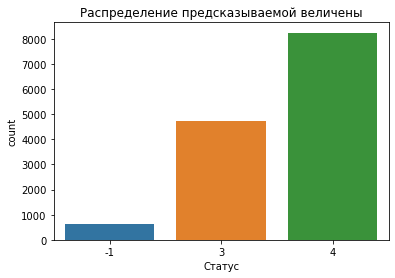

In [11]:
sns.countplot(x = "Статус" , data  = train).set_title('Распределение предсказываемой величены')

Text(0.5, 1.0, 'Распределение года поступления')

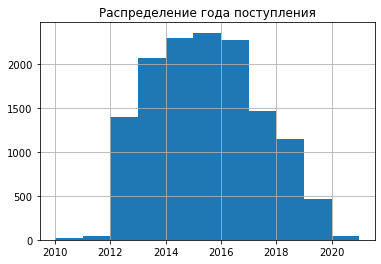

In [12]:
train["Год_Поступления"].hist(bins = 11, range = [2010, 2021]).set_title('Распределение года поступления')

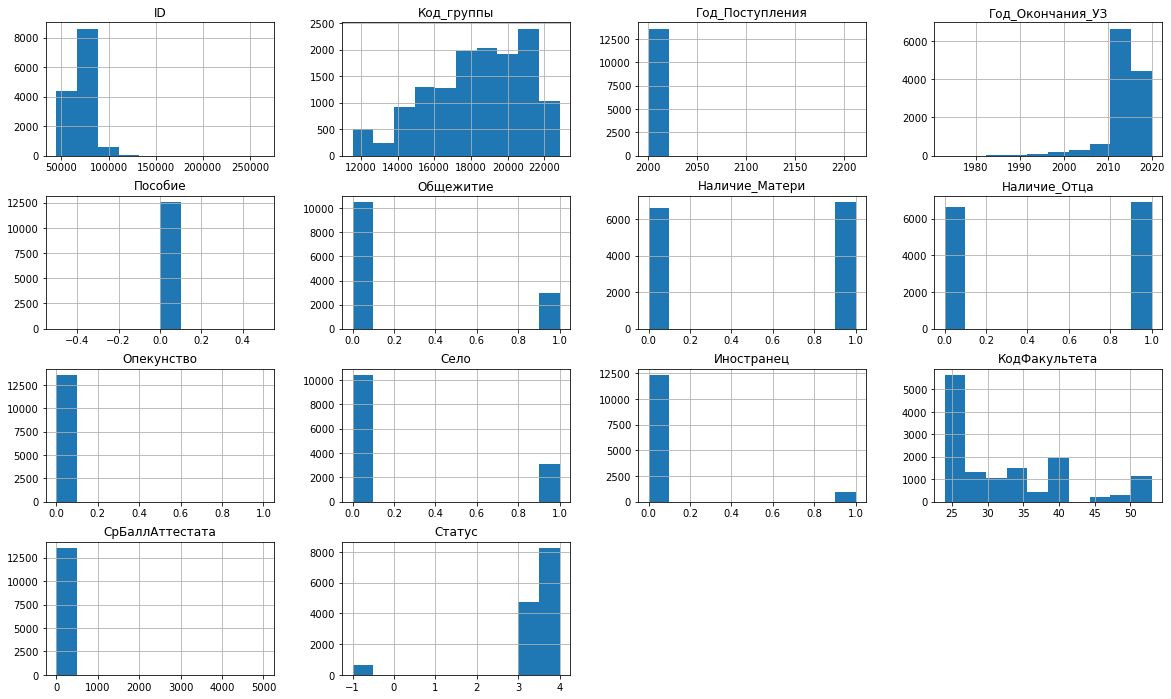

In [13]:
all_columns = train[train.columns].hist(figsize=(20,12))

In [14]:
train["Пособие"].value_counts()

0.0    12576
Name: Пособие, dtype: int64

In [15]:
train["Опекунство"].value_counts()

0.0    13578
1.0        6
Name: Опекунство, dtype: int64

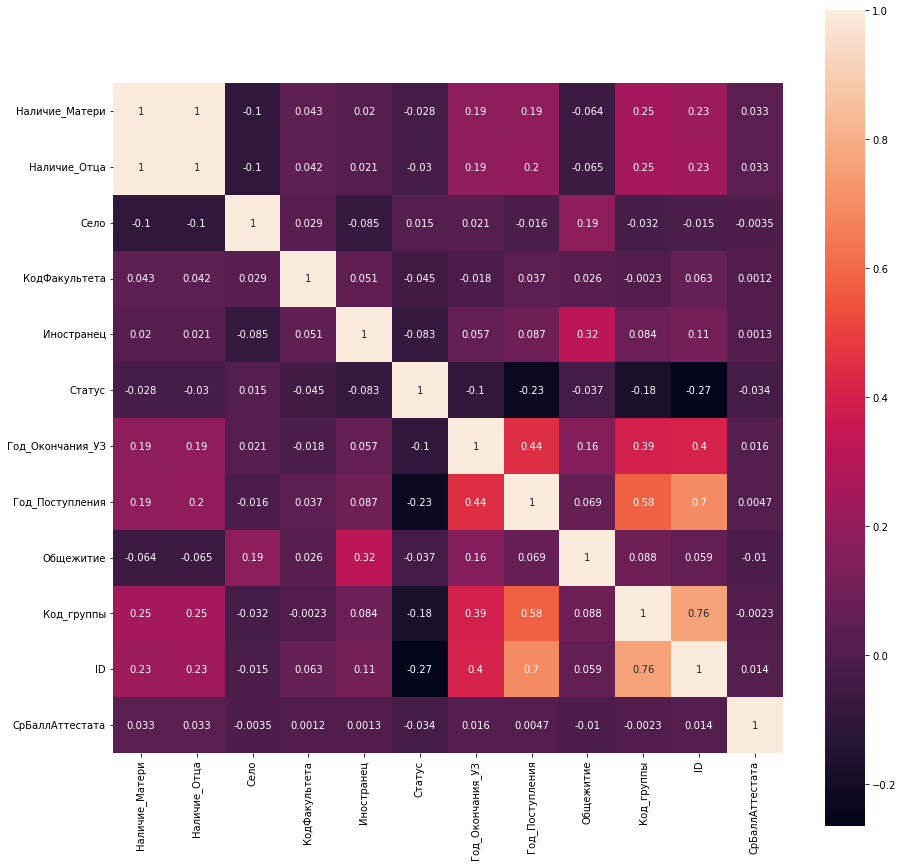

In [16]:
plt.rcParams['figure.figsize']=(15,15)


train_corr = list(set(train.columns.values) - set(['Опекунство','Пособие']))
g = sns.heatmap(train[train_corr].corr(), square = True, annot=True)

<div class="alert alert-info">
<b>Мини-вывод по итогам первичного изучения данных:</b>
<br> 1) Датасет sample_submission состоит из 2 признков(столбцов) и 6691 строк, тренировочный датасет состоит из 24 признаков(столбцов) и 13584 строк, тестовый датасет состоит из 23 признаков(столбцов) и 6691 строк;
<br> 2) Дубликаты отсутствуют в каждом из 3 датафремов;
<br> 3) Пропуски присутствуют в тренировочном и тестовом датафреймах (будут дополнительно проработаны в рамках предобработки данных);
<br> 4) Данные в целом без выбросов, однако в признаке СрБаллАттестата и год поступления есть аномальные значения (будет дополнительно обрабатываться врамках предобработки)
<br> 5) Целевой признак категориальный, поэтому будет решаться задача классификации
</div>


# Предобработка данных

In [17]:
train = train.fillna(0)

In [18]:
train['Пол'].value_counts()

Жен    8133
Муж    5443
0         7
муж       1
Name: Пол, dtype: int64

In [19]:
train['Пол'] = train['Пол'].apply(lambda x:1 if x=='Жен' else 0)

In [20]:
train['Изучаемый_Язык'].value_counts()

Английский язык                  10450
Немецкий язык                     2219
0                                  826
Французский язык                    54
Русский язык                        11
Иностранный язык (Английский)       10
Англиийский                         10
Иностранный язык (Немецкий)          4
Name: Изучаемый_Язык, dtype: int64

In [21]:
train.loc[train['Изучаемый_Язык'] == 'Англиийский', 'Изучаемый_Язык'] = 'Английский язык'

In [22]:
train.loc[train['Изучаемый_Язык'] == 'Иностранный язык (Английский)', 'Изучаемый_Язык'] = 'Английский язык'

In [23]:
train.loc[train['Изучаемый_Язык'] == 'Иностранный язык (Немецкий)', 'Изучаемый_Язык'] = 'Немецкий язык'

In [24]:
train['Изучаемый_Язык'] = train['Изучаемый_Язык'].apply(lambda x:1 if x=='Английский язык' else 0)

In [25]:
train['Страна_ПП'] = train['Страна_ПП'].str.lower()

In [26]:
train['Страна_ПП'].value_counts()

россия                    12472
казахстан                   415
китай                       148
таджикистан                 118
кыргызстан                   32
киргизия                     21
казахстан респ                6
кыргызия                      6
росссия                       2
монголия                      2
кыргызская республика         2
таджикистан респ              2
туркменистан                  2
армения                       2
узбекистан                    1
нигерия                       1
франция                       1
казахстан вко                 1
республика казахстан          1
республика таджикистан        1
украина                       1
Name: Страна_ПП, dtype: int64

In [27]:
train.loc[train['Страна_ПП'] =='киргизия','Страна_ПП'] = 'кыргызстан'

In [28]:
train.loc[train['Страна_ПП'] =='казахстан респ','Страна_ПП'] = 'казахстан'

In [29]:
train.loc[train['Страна_ПП'] =='кыргызия','Страна_ПП'] = 'кыргызстан'

In [30]:
train.loc[train['Страна_ПП'] =='таджикистан респ','Страна_ПП'] = 'таджикистан'

In [31]:
train.loc[train['Страна_ПП'] =='кыргызская республика','Страна_ПП'] = 'кыргызстан'

In [32]:
train.loc[train['Страна_ПП'] =='росссия','Страна_ПП'] = 'россия'

In [33]:
train.loc[train['Страна_ПП'] =='казахстан вко','Страна_ПП'] = 'казахстан'

In [34]:
train.loc[train['Страна_ПП'] =='республика казахстан','Страна_ПП'] = 'казахстан'

In [35]:
train.loc[train['Страна_ПП'] =='республика таджикистан','Страна_ПП'] = 'таджикистан'

In [36]:
train['Страна_ПП'] = train['Страна_ПП'].apply(lambda x:1 if x=='россия' else 0)

In [37]:
train['Регион_ПП'].value_counts()

Алтайский край                11492
0                               618
Алтай Респ                      204
Республика Алтай                203
Восточно-Казахстанская обл      193
                              ...  
Баткенская область                1
Желал-Абадская обл                1
Магаданская Обл                   1
Джалал-Абадская                   1
Шэньси провинция                  1
Name: Регион_ПП, Length: 193, dtype: int64

In [38]:
train['Регион_ПП'] = train['Регион_ПП'].apply(lambda x:1 if x=='Алтайский край' else 0)

In [39]:
train['Город_ПП'].value_counts()

Барнаул г         3735
г. Барнаул        1727
Барнаул           1174
0                  443
Бийск г            246
                  ... 
Марушка              1
с. Гилево            1
Чернышевский п       1
Кисилёвск г          1
Шила с               1
Name: Город_ПП, Length: 1766, dtype: int64

In [40]:
train['Город_ПП'] = train['Город_ПП'].apply(lambda x:1 if 'Барнаул' in str(x) else 0)

In [41]:
names = list(train.columns[train.dtypes=='object'])

In [42]:
for name in names:
    ind = list(pd.unique(train[name]))
    train[name] = train[name].apply(lambda x: ind.index(x))

<div class="alert alert-info">
<b>Мини-вывод:</b>
<br> 1) В ходе предобработки были преобразованы категориальные данные в числовые для удобства работы с ними при построении модели;
<br> 2) Обработаны повторяющиеся категории, которые были вписаны вручную и образовали многочисленные повторы.
</div>


# Выделим выборки

In [43]:
X = train.drop(['Статус'], axis = 1)
y = train[["Статус"]]

In [44]:
X.shape

(13584, 23)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучение модели

## Дерево решений

In [46]:
model_DTC = DecisionTreeClassifier(random_state = 42)
model_DTC.fit(X_train,y_train)
prediction_DTC = model_DTC.predict(X_test)

In [47]:
f1_score(y_test, prediction_DTC, average='macro', zero_division = 0)

0.6756826322873767

## Случайный лес

In [48]:
model_RFC = RandomForestClassifier(class_weight = 'balanced',random_state = 42,n_estimators = 200)
model_RFC.fit(X_train,y_train)
prediction_RFC = model_RFC.predict(X_test)

C:\Users\Ekaterina\AppData\Local\Temp\ipykernel_5068\786477479.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_RFC.fit(X_train,y_train)


In [49]:
f1_score(y_test, prediction_RFC, average='macro', zero_division = 0)

0.7231642463346896

## Логистическая регрессия

In [50]:
model_LR = LogisticRegression(solver='liblinear')
model_LR.fit(X_train,y_train)
prediction_LR = model_LR.predict(X_test)

C:\Users\Ekaterina\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [51]:
f1_score(y_test, prediction_LR, average='macro', zero_division = 0)

0.45912656411564906

<div class="alert alert-info">
<b>Мини-вывод:</b>
<br> Наилучший результат метрики f1 score показал алгоритм Случайный лес (Random Forest), поэтому при формировании ответа будем использовать его
</div>


## Оценка качества предсказания

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction_RFC))

print(model_RFC.score(X_test,y_test))

              precision    recall  f1-score   support

          -1       0.72      0.34      0.46       189
           3       0.86      0.74      0.79      1391
           4       0.87      0.97      0.91      2496

    accuracy                           0.86      4076
   macro avg       0.81      0.68      0.72      4076
weighted avg       0.86      0.86      0.85      4076

0.8608930323846908


# Создание файла с ответом

## Предобработка тестового датафрейма

In [53]:
test = test.fillna(0)

In [54]:
test['Пол'].value_counts()

Жен    3974
Муж    2713
0         3
жен       1
Name: Пол, dtype: int64

In [55]:
test['Пол'] = test['Пол'].apply(lambda x:1 if x=='Жен' else 0)

In [56]:
test['Изучаемый_Язык'].value_counts()

Английский язык                  5202
Немецкий язык                    1047
0                                 396
Французский язык                   28
Англиийский                         8
Иностранный язык (Английский)       8
Русский язык                        1
Английский, немецкий языки          1
Name: Изучаемый_Язык, dtype: int64

In [57]:
test.loc[test['Изучаемый_Язык'] == 'Англиийский', 'Изучаемый_Язык'] = 'Английский язык'

In [58]:
test.loc[test['Изучаемый_Язык'] == 'Иностранный язык (Английский)', 'Изучаемый_Язык'] = 'Английский язык'

In [59]:
test.loc[test['Изучаемый_Язык'] == 'Английский, немецкий языки', 'Изучаемый_Язык'] = 'Английский язык'

In [60]:
test['Изучаемый_Язык'] = test['Изучаемый_Язык'].apply(lambda x:1 if x=='Английский язык' else 0)

In [61]:
test['Страна_ПП'].value_counts()

Россия                   6127
Казахстан                 194
0                         160
Китай                      81
Таджикистан                42
РОССИЯ                     34
Кыргызстан                 20
Киргизия                   12
Узбекистан                  4
Кыргызская Республика       3
Казахстан респ              3
Кыргызия                    2
Казахстан Респ              2
Республика Казахстан        1
Монголия                    1
Казахстан ВКО               1
КИТАЙ                       1
КАЗАХСТАН                   1
Афганистан                  1
Туркменистан                1
Name: Страна_ПП, dtype: int64

In [62]:
test['Страна_ПП'] = test['Страна_ПП'].str.lower()

In [63]:
test.loc[test['Страна_ПП'] =='киргизия','Страна_ПП'] = 'кыргызстан'

In [64]:
test.loc[test['Страна_ПП'] =='казахстан респ','Страна_ПП'] = 'казахстан'

In [65]:
test.loc[test['Страна_ПП'] =='кыргызия','Страна_ПП'] = 'кыргызстан'

In [66]:
test.loc[test['Страна_ПП'] =='таджикистан респ','Страна_ПП'] = 'таджикистан'

In [67]:
test.loc[test['Страна_ПП'] =='кыргызская республика','Страна_ПП'] = 'кыргызстан'

In [68]:
test.loc[test['Страна_ПП'] =='росссия','Страна_ПП'] = 'россия'

In [69]:
test.loc[test['Страна_ПП'] =='казахстан вко','Страна_ПП'] = 'казахстан'

In [70]:
test.loc[test['Страна_ПП'] =='республика казахстан','Страна_ПП'] = 'казахстан'

In [71]:
test.loc[test['Страна_ПП'] =='республика таджикистан','Страна_ПП'] = 'таджикистан'

In [72]:
test['Страна_ПП'] = test['Страна_ПП'].apply(lambda x:1 if x=='россия' else 0)

In [73]:
test['Регион_ПП'].value_counts()

Алтайский край                5722
0                              290
Республика Алтай               100
Восточно-Казахстанская обл      79
Алтай Респ                      76
                              ... 
пров. Хубэй                      1
Гиссарский р-н                   1
Согдийская область               1
Дагестан респ                    1
Чуйская область                  1
Name: Регион_ПП, Length: 134, dtype: int64

In [74]:
test['Регион_ПП'] = test['Регион_ПП'].apply(lambda x:1 if x=='Алтайский край' else 0)

In [75]:
test['Город_ПП'].value_counts()

Барнаул г            1872
г. Барнаул            879
Барнаул               575
0                     214
Бийск г               120
                     ... 
с. Степнной Кучук       1
Прокопьевск             1
Заводское с             1
Ананьевка с             1
Чемал                   1
Name: Город_ПП, Length: 1095, dtype: int64

In [76]:
test['Город_ПП'] = test['Город_ПП'].apply(lambda x:1 if 'Барнаул' in str(x) else 0)

In [77]:
names = list(test.columns[test.dtypes=='object'])

In [78]:
for name in names:
    ind = list(pd.unique(test[name]))
    test[name] = test[name].apply(lambda x: ind.index(x))

## Создание файла с ответом

In [79]:
test_prediction = model_RFC.predict(test)

In [80]:
submission["Статус"] = test_prediction
submission.head(4)

,ID,Статус
0,64996,4
1,71837,4
2,86587,3
3,73673,3


In [81]:
submission.to_csv("submission_altai_povarkova.csv",index=False)

# Общий вывод

<br> 1) Данные загружены и изучены. В ходе изучения были выявлены пропуски и незначительные выбросы;
<br> 2) В рамках предобработки были обработаны данные, внесенные вручную студентами при поступлении, которые полны повторов, но с разным написанием. В конечном итоге они были преобразованы в числовой формат, который формровался по индексу или по наиболее большему числу совпадений(например, изучаемый язык был преобразован в 2 категоии, где 0 - наименее популярные категории, а 1 - английский язык, который наиболее часто встречается);
<br> 3) Данные разделены на выборки, которые в дальнейшем использовались при обучении моделей;
<br> 4) Всего было обучено 3 модели: Дерево решений, Случайный лес и Логистическая регрессия. Наилучший результат по метрики f1 score был получен у алгоритма Случайный и лес,он составляет 0.7231642463346896;
<br> 5) Наиболее успешный алгоритм применен на тестовом датасете. 
<br> Алгоритм выполнения проекта исследования выполнен полностью. Данные изучены, преодбработаны и обучены;
<br> Сформирован итоговый файл csv с ответом на техническое задание. Модель предсказывает статус студентов. Задача чемпионата выполнена